In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
data = pd.concat([train, test], axis=0, sort=False)

In [2]:
# === unique value
col_var = train.columns[2:]
df = pd.DataFrame(col_var, columns=['feature'])
df['n_train_unique'] = train[col_var].nunique(axis=0).values
df['n_test_unique'] = test[col_var].nunique(axis=0).values

for i in df.index:
    col = df.loc[i, 'feature']
    df.loc[i, 'n_overlap'] = int(np.isin(train[col].unique(), test[col]).sum())

df['value_range'] = data[col_var].max(axis=0).values - data[col_var].min(axis=0).values

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
feature,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
n_train_unique,94672,108932,86555,74597,63515,141029,38599,103063,98617,49417,128764,130193,9561,115181,79122,19810,86918,137823,139515,144180,127764,140062,90660,24913,105101,14853,127089,60185,35859,88339,145977,77388,85964,112239,25164,122384,96404,79040,115366,112674,141878,131896,31592,15188,127702,169968,93450,154781,152039,140641,32308,143455,121313,33460,144776,128077,103045,35545,113907,37744,113763,159369,74777,97098,59379,108347,47722,137253,451,110346,153193,13527,110114,142582,161058,129383,139317,106809,72254,53212,136432,79065,144829,144281,133766,108437,140594,125296,84918,103522,157210,7962,110743,26708,89146,29387,148099,158739,33266,69300,150727,122295,146237,9376,72627,39115,71065,137827,8525,112172,106121,46464,60482,116496,43084,86729,63467,164469,143667,112403,158269,64695,121767,129893,91022,16059,32411,95710,98200,113425,36638,21464,57923,19236,131619,140774,156615,144397,117428,137294,121384,134443,128613,94372,40595,108526,84314,137559,10608,148504,83660,109667,95823,73728,119342,127457,40634,126534,144556,112830,156274,11071,57396,123168,122744,119403,17902,140954,97227,18242,113720,125914,143366,128120,134945,92659,142521,85720,145235,90090,123477,56164,149195,117529,145184,120747,98060,157031,108813,41764,114959,94266,59065,110557,97069,57870,125560,40537,94153,149430
n_test_unique,65580,71661,61865,56507,49995,83228,33273,69487,67521,41583,79221,79749,9121,74037,58951,18253,61906,82518,82682,84370,78645,82738,63855,22619,70202,13728,78260,48428,31321,62618,84985,57146,61890,73157,22954,76756,66309,58742,74294,73292,83405,80327,28163,14288,78457,92058,65189,87427,86929,82973,28412,83881,76266,29631,84548,79114,69316,31286,73482,32888,73575,88874,55891,66913,47632,71421,40071,81931,428,72217,86863,12604,72162,83685,89343,79183,82703,71025,54942,44041,8

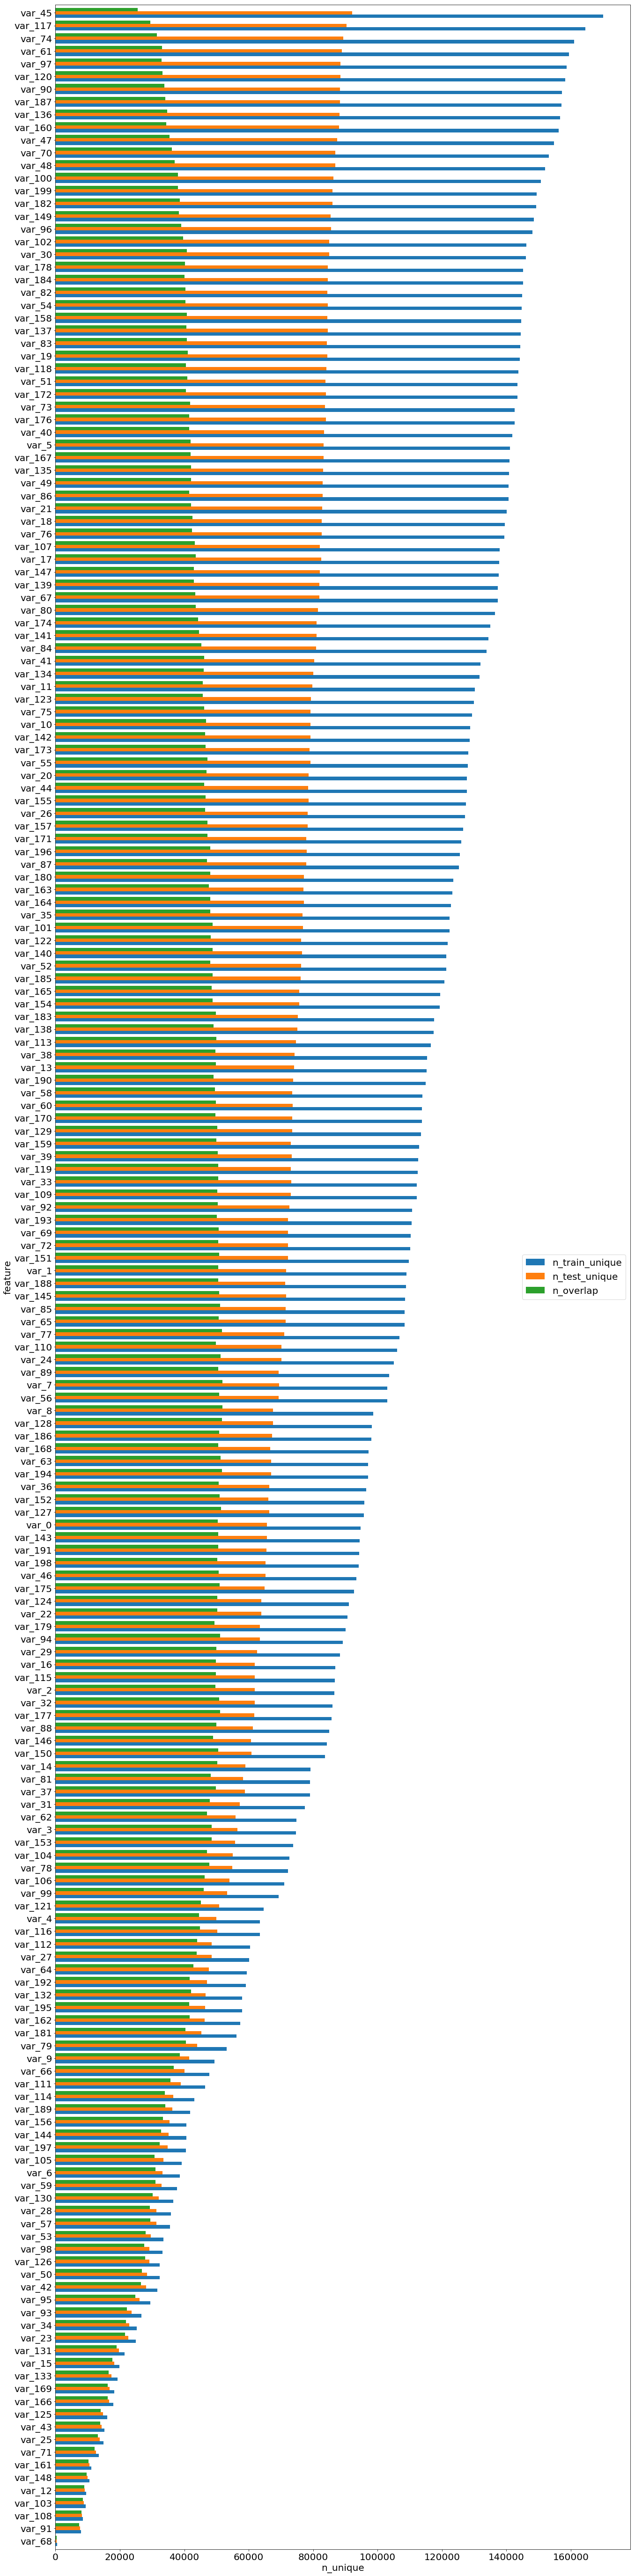

In [4]:
# === plot
df = df.sort_values(by='n_train_unique').reset_index(drop=True)
df[['n_train_unique', 'n_test_unique', 'n_overlap']].plot(kind='barh' ,figsize=(22, 100), fontsize=20, width=0.8)
plt.yticks(df.index, df['feature'].values)
plt.xlabel('n_unique', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.legend(loc='center right', fontsize=20)